<a href="https://colab.research.google.com/github/aly202012/tensorflow-deep-learning/blob/main/Copy_of_breast_cancer_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('breast-cancer-classifiction')
jovian.set_colab_id('1fBSKRC53UgDGAGxXkJQo8Cbdi7RlrHT5')

# breast-cancer-classifiction

Use the "Run" button to execute the code.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="breast-cancer-classifiction")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alymohammedbakhit2020/breast-cancer-classifiction


'https://jovian.ai/alymohammedbakhit2020/breast-cancer-classifiction'

In [ ]:
import os 
os.environ["KAGGLE_CONFIG_DIR"]="/content"

In [ ]:
! kaggle datasets download -d shravan3273/breast-cancer-classifiction

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 44.6MB/s]


In [ ]:
! unzip \*.zip && rm *.zip

Archive:  breast-cancer-classifiction.zip
  inflating: breastcancer.csv        


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/breastcancer.csv")

In [ ]:
data.shape

(569, 32)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.drop("id",axis=1,inplace=True)

In [ ]:
# Here we have divided the features into sections according to their importance
features_mean= list(data.columns[1:11])
features_se= list(data.columns[11:21])
features_worst=list(data.columns[21:31])
print(features_mean)
print("-----------------------------------")
print(features_se)
print("------------------------------------")
print(features_worst)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
-----------------------------------
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
------------------------------------
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [ ]:
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
for i in data.columns:
  print(i, data[i].unique())

diagnosis [1 0]
radius_mean [17.99  20.57  19.69  11.42  20.29  12.45  18.25  13.71  13.    12.46
 16.02  15.78  19.17  15.85  13.73  14.54  14.68  16.13  19.81  13.54
 13.08   9.504 15.34  21.16  16.65  17.14  14.58  18.61  15.3   17.57
 18.63  11.84  17.02  19.27  16.74  14.25  13.03  14.99  13.48  13.44
 10.95  19.07  13.28  13.17  18.65   8.196 12.05  13.49  11.76  13.64
 11.94  18.22  15.1   11.52  19.21  14.71  13.05   8.618 10.17   8.598
  9.173 12.68  14.78   9.465 11.31   9.029 12.78  18.94   8.888 17.2
 13.8   12.31  16.07  13.53  18.05  20.18  12.86  11.45  13.34  25.22
 19.1   12.    18.46  14.48  19.02  12.36  14.64  14.62  15.37  13.27
 13.45  15.06  20.26  12.18   9.787 11.6   14.42  13.61   6.981  9.876
 10.49  13.11  11.64  22.27  11.34   9.777 12.63  14.26  10.51   8.726
 11.93   8.95  14.87  17.95  11.41  18.66  24.25  14.5   13.37  13.85
 19.    19.79  12.19  15.46  16.16  15.71  18.45  12.77  11.71  11.43
 14.95  11.28   9.738 16.11  12.9   10.75  11.9   11.8   14.

In [ ]:

from sklearn.preprocessing import LabelEncoder
object_1=LabelEncoder()
# During the conversion process, we used the first projection.
for i in data.columns:
    data[i] = object_1.fit_transform(data[i])

In [ ]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,370,1,455,452,444,531,521,526,416,483,525,169,520,515,277,489,460,400,439,489,425,41,497,516,358,516,520,483,485,506
1,1,426,186,486,513,120,215,321,396,219,91,424,91,396,450,145,135,177,336,81,309,419,199,465,511,158,210,278,401,222,375
2,1,406,324,478,487,403,459,478,516,348,184,481,117,458,476,257,455,368,465,343,407,399,261,455,491,287,464,438,468,445,361
3,1,98,297,164,95,471,533,507,493,426,498,404,278,400,281,451,526,469,450,495,523,215,298,281,194,408,524,511,479,499,533
4,1,418,60,493,506,332,414,480,492,216,147,484,114,485,477,509,319,471,453,208,446,381,28,453,470,239,245,415,363,81,216


In [ ]:
# In that code, we smoothen the data.
#Import Libraries
from sklearn.preprocessing import StandardScaler
#Standard Scaler for Data
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
new_data= scaler.fit_transform(data)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


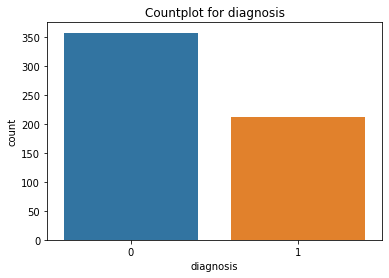

In [ ]:
sns.countplot(data["diagnosis"])
plt.title("Countplot for diagnosis")
plt.show()

In [ ]:
data["area_mean"]

0      452
1      513
2      487
3       95
4      506
      ... 
564    522
565    499
566    421
567    501
568      3
Name: area_mean, Length: 569, dtype: int64

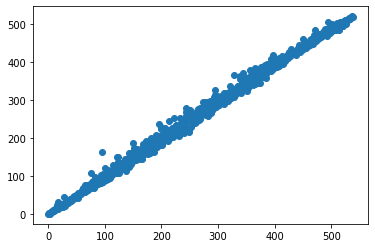

In [ ]:
plt.scatter(data['area_mean'],data['perimeter_mean'])

In [ ]:
# We note that the correlation coefficient between the values is good
data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.742827,0.458623,0.747092,0.734770,0.372423,0.605768,0.732390,0.779702,0.334370,-0.023166,0.620254,0.022706,0.632522,0.721573,-0.051898,0.379460,0.468409,0.487430,-0.090555,0.200631,0.793618,0.475669,0.785825,0.785522,0.426936,0.607784,0.704746,0.779755,0.397952,0.310819
radius_mean,0.742827,1.000000,0.345239,0.995636,0.998156,0.160984,0.503571,0.653984,0.768864,0.128979,-0.344181,0.572478,-0.132144,0.585408,0.757137,-0.311409,0.270489,0.370548,0.421217,-0.230117,0.000589,0.978884,0.318047,0.969468,0.977448,0.133004,0.492684,0.600307,0.732001,0.177525,0.046240
texture_mean,0.458623,0.345239,1.000000,0.345625,0.342979,0.021744,0.262162,0.339786,0.305719,0.109644,-0.059888,0.362188,0.453184,0.384748,0.394787,0.037844,0.261942,0.285034,0.236837,0.008539,0.146701,0.368990,0.909716,0.368970,0.365995,0.099222,0.289511,0.336786,0.315397,0.117986,0.114304
perimeter_mean,0.747092,0.995636,0.345625,1.000000,0.996984,0.183623,0.541462,0.679614,0.788028,0.148716,-0.304309,0.561226,-0.138461,0.583163,0.750500,-0.313063,0.305765,0.398769,0.441280,-0.229737,0.029917,0.980044,0.321515,0.979124,0.981099,0.155454,0.534041,0.631062,0.755436,0.199524,0.087578
area_mean,0.734770,0.998156,0.342979,0.996984,1.000000,0.141610,0.488167,0.642225,0.756440,0.114283,-0.356689,0.558918,-0.141032,0.572848,0.749380,-0.326153,0.258982,0.360569,0.407631,-0.242737,-0.012550,0.978752,0.317042,0.971694,0.980467,0.119888,0.485374,0.593589,0.722511,0.171499,0.038061
smoothness_mean,0.372423,0.160984,0.021744,0.183623,0.141610,1.000000,0.678077,0.517615,0.567139,0.533066,0.579841,0.330906,0.089535,0.328614,0.296261,0.337498,0.385748,0.352353,0.443599,0.142907,0.402635,0.210766,0.060254,0.221997,0.192574,0.800043,0.482157,0.430257,0.500685,0.389136,0.507820
compactness_mean,0.605768,0.503571,0.262162,0.541462,0.488167,0.678077,1.000000,0.896145,0.848325,0.550616,0.500494,0.506181,0.049170,0.582420,0.541225,0.127997,0.817550,0.772127,0.735055,0.097278,0.619522,0.544721,0.253131,0.585344,0.528761,0.583053,0.900967,0.837517,0.824822,0.448559,0.687206
concavity_mean,0.732390,0.653984,0.339786,0.679614,0.642225,0.517615,0.896145,1.000000,0.927381,0.448624,0.262631,0.577663,0.054617,0.647610,0.649093,0.071687,0.760938,0.857613,0.777077,0.024804,0.514672,0.686228,0.334521,0.714769,0.674262,0.490080,0.849735,0.938586,0.904064,0.384047,0.541612
concave points_mean,0.779702,0.768864,0.305719,0.788028,0.756440,0.567139,0.848325,0.927381,1.000000,0.426771,0.146260,0.639861,0.012861,0.683461,0.734248,0.018467,0.606835,0.672697,0.760309,-0.025984,0.378647,0.792950,0.300847,0.809138,0.780010,0.493074,0.758364,0.827513,0.936857,0.357440,0.420894
symmetry_mean,0.334370,0.128979,0.109644,0.148716,0.114283,0.533066,0.550616,0.448624,0.426771,1.000000,0.436069,0.342275,0.146294,0.358872,0.293504,0.208261,0.438617,0.370644,0.387899,0.390378,0.407406,0.169005,0.119146,0.183739,0.153367,0.426998,0.444953,0.396517,0.399128,0.711928,0.412329


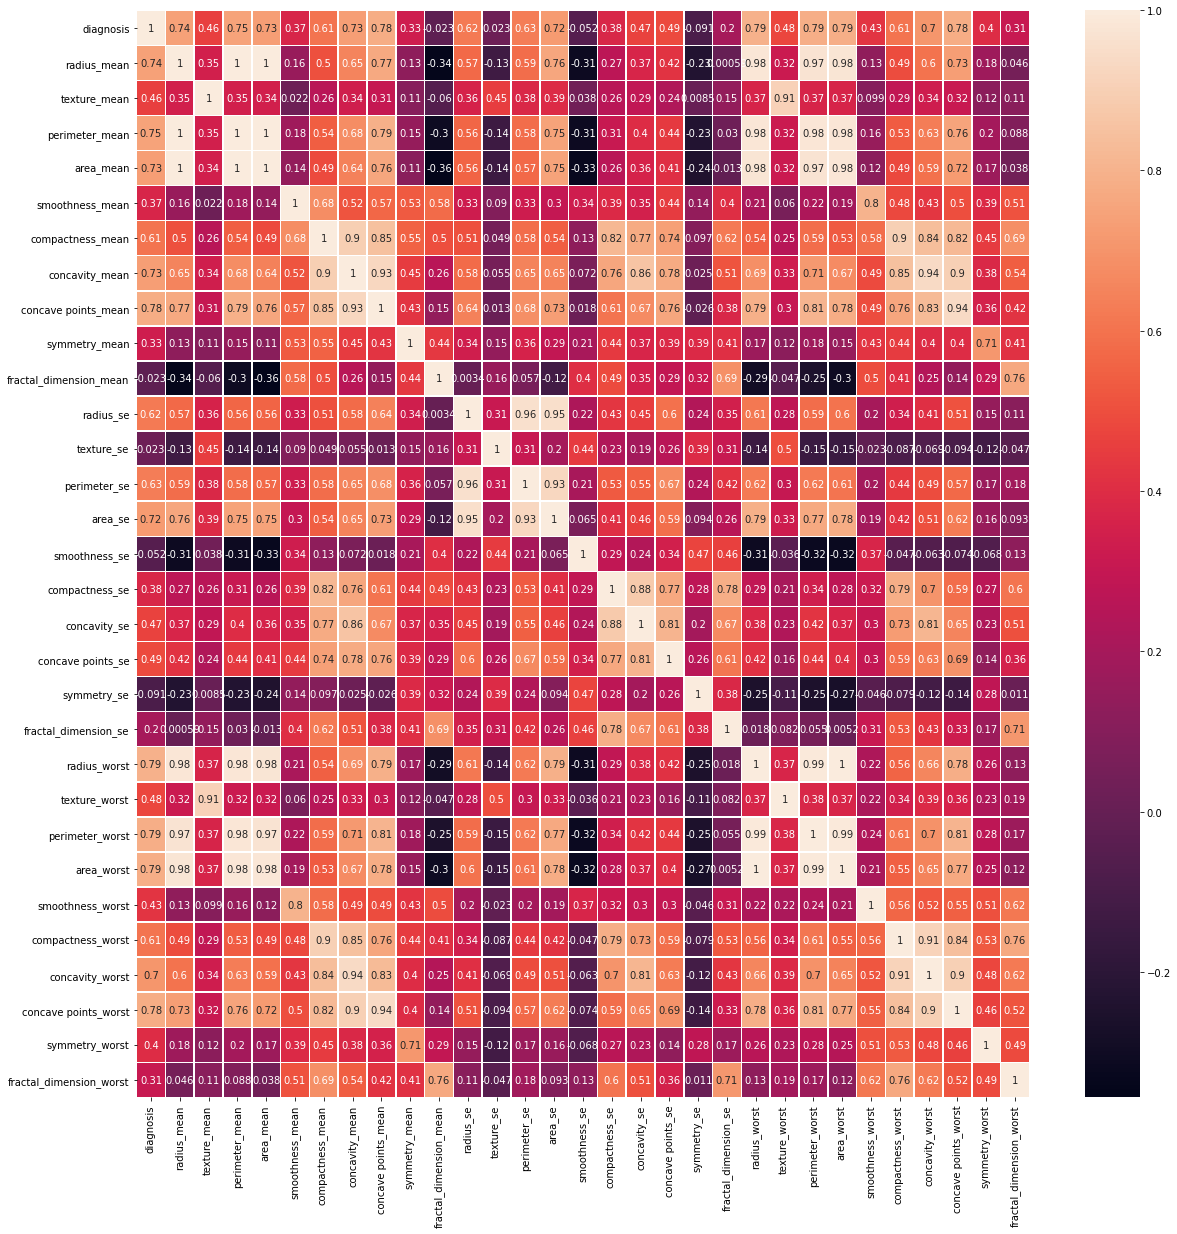

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

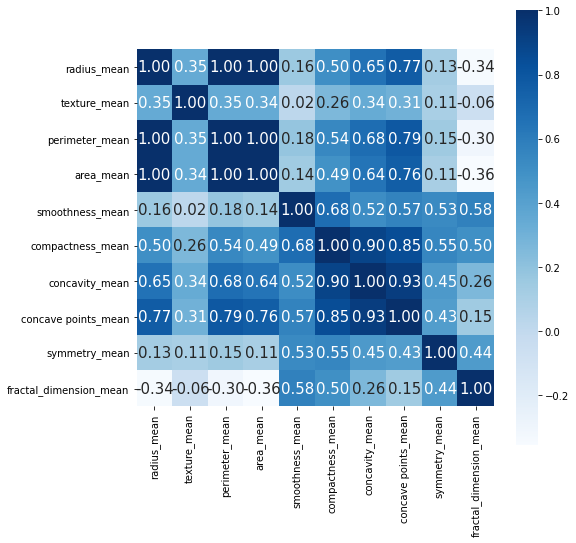

In [ ]:
corr = data[features_mean].corr() # .corr is used for find corelation
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features_mean, yticklabels= features_mean,
           cmap= 'Blues') 

Here began the process of extracting the best features.
We could have done the whole process using one of the algorithms depending on the relationship.

In [ ]:
df1=data.drop(features_worst,axis=1)

In [ ]:
cols = ['perimeter_mean','perimeter_se','area_mean','area_se']
df1 = df1.drop(cols, axis=1)

In [ ]:
cols = ['concavity_mean',
        'concavity_se', 
        'concave points_mean', 
        'concave points_se']
df1 = df1.drop(cols, axis=1)

In [ ]:
df1.shape

(569, 13)

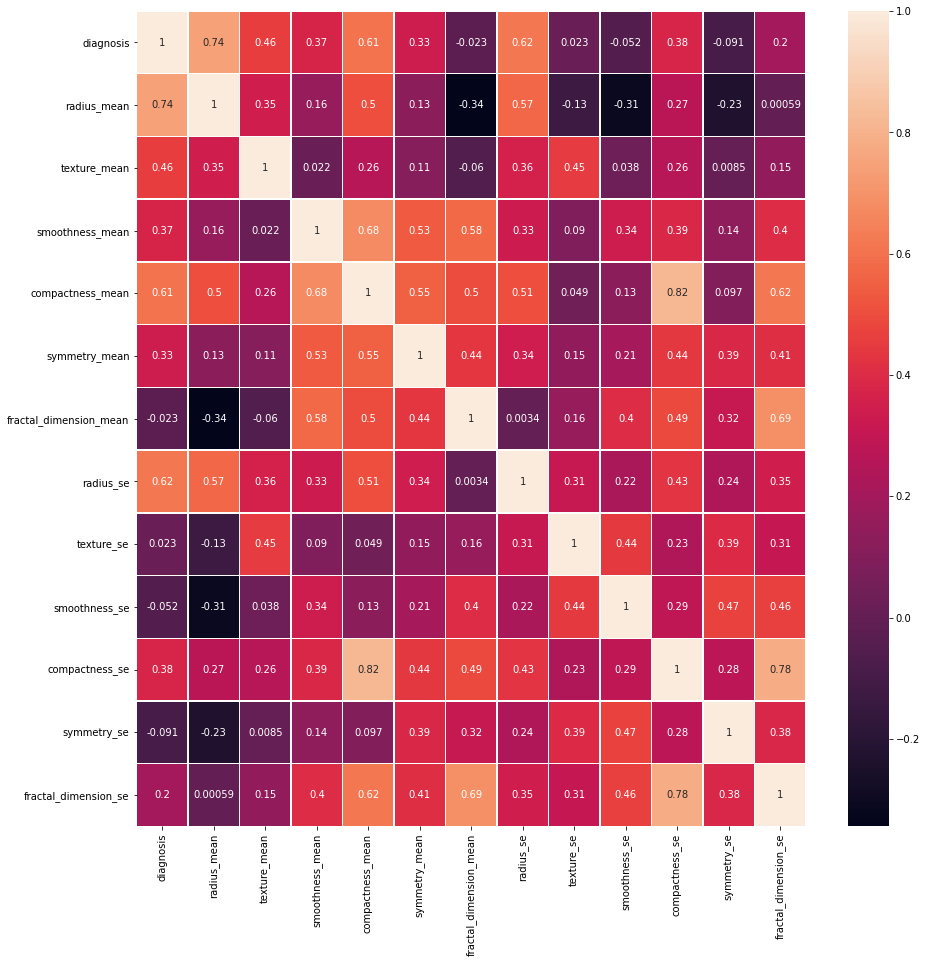

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df1.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()

In [ ]:
data_2=df1

In [ ]:
# In this way, we could extract the strongest advantages.
# Import Libraries
#from sklearn.feature_selection import SelectPercentile
#FeatureSelection = SelectPercentile(score_func = chi2, percentile=20) # score_func can = f_classif
#data_2= FeatureSelection.fit_transform(data)


In [ ]:
# Finally, we extracted the features we needed.
useful_features=list(data_2.columns[1:])
print(useful_features)
print(len(useful_features))

['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']
12


Here we have printed the most relevant elements for the goal we want to build the model on, and this printing is arranged in descending order.

In [ ]:
corr1=data_2.corr()
corr1.nlargest(13,['diagnosis'])['diagnosis'] # Arranged by goal.

diagnosis                 1.000000
radius_mean               0.742827
radius_se                 0.620254
compactness_mean          0.605768
texture_mean              0.458623
compactness_se            0.379460
smoothness_mean           0.372423
symmetry_mean             0.334370
fractal_dimension_se      0.200631
texture_se                0.022706
fractal_dimension_mean   -0.023166
smoothness_se            -0.051898
symmetry_se              -0.090555
Name: diagnosis, dtype: float64

Now that we have finished preparing the data.
Let's start working on the model.

In [ ]:
from sklearn.model_selection import train_test_split
# First, we separate the objective from the rest of the features.
target= data_2["diagnosis"].values
feature= data_2.drop(["diagnosis"],axis=1)

In [ ]:
# Here we have reduced the amount of data used in the testing process because the data is very small
x_train,x_test,y_train,y_test=train_test_split(feature,target,test_size=0.1,random_state=40)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(512, 12) (57, 12) (512,) (57,)


#We start making our own model

In [ ]:
# Here we will call the libraries that we need.
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # empty neural network
from keras.layers import Dense # layer constitution


In [ ]:
def build_classifier():
    classifier = Sequential() # initialize neural network architecture
    classifier.add(Dense(units = 8, kernel_initializer="uniform", activation="relu", input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer="uniform", activation="relu")) #kernel_initializer: to initialize weights
    classifier.add(Dense(units = 1, kernel_initializer="uniform", activation="sigmoid")) #output layer
    classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs=70, batch_size=10)
# epoch = number of iteration, batch size : efers to the number of training examples utilized in one iteration.
accurisies = cross_val_score(estimator=classifier, X=x_train, y = y_train, cv = 2)
mean = accurisies.mean()
variance = accurisies.std()
print("Accuracy mean : ", str(mean))
print("Accuracy variance : ", str(variance))


Epoch 1/70
26/26 [==============================] - 1s 2ms/step - loss: 0.6906 - accuracy: 0.5567
Epoch 2/70
26/26 [==============================] - 0s 1ms/step - loss: 0.6573 - accuracy: 0.6815
Epoch 3/70
26/26 [==============================] - 0s 2ms/step - loss: 0.5789 - accuracy: 0.7226
Epoch 4/70
26/26 [==============================] - 0s 1ms/step - loss: 0.4619 - accuracy: 0.7818
Epoch 5/70
26/26 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.7839
Epoch 6/70
26/26 [==============================] - 0s 1ms/step - loss: 0.4023 - accuracy: 0.7921
Epoch 7/70
26/26 [==============================] - 0s 1ms/step - loss: 0.3796 - accuracy: 0.8114
Epoch 8/70
26/26 [==============================] - 0s 1ms/step - loss: 0.3810 - accuracy: 0.8184
Epoch 9/70
26/26 [==============================] - 0s 1ms/step - loss: 0.3746 - accuracy: 0.8088
Epoch 10/70
26/26 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8306
Epoch 11/70
26/26 [

In [ ]:
history = classifier.fit(x_test, y_test, validation_split=0.20, epochs=70, batch_size=10, verbose=1)

Epoch 1/70
5/5 [==============================] - 2s 70ms/step - loss: 0.6907 - accuracy: 0.6412 - val_loss: 0.6905 - val_accuracy: 0.6667
Epoch 2/70
5/5 [==============================] - 0s 7ms/step - loss: 0.6841 - accuracy: 0.6583 - val_loss: 0.6881 - val_accuracy: 0.6667
Epoch 3/70
5/5 [==============================] - 0s 6ms/step - loss: 0.6742 - accuracy: 0.6917 - val_loss: 0.6850 - val_accuracy: 0.6667
Epoch 4/70
5/5 [==============================] - 0s 7ms/step - loss: 0.6568 - accuracy: 0.7431 - val_loss: 0.6816 - val_accuracy: 0.6667
Epoch 5/70
5/5 [==============================] - 0s 7ms/step - loss: 0.6563 - accuracy: 0.6361 - val_loss: 0.6713 - val_accuracy: 0.6667
Epoch 6/70
5/5 [==============================] - 0s 8ms/step - loss: 0.6318 - accuracy: 0.7319 - val_loss: 0.6621 - val_accuracy: 0.7500
Epoch 7/70
5/5 [==============================] - 0s 8ms/step - loss: 0.6043 - accuracy: 0.8144 - val_loss: 0.6513 - val_accuracy: 0.7500
Epoch 8/70
5/5 [=================

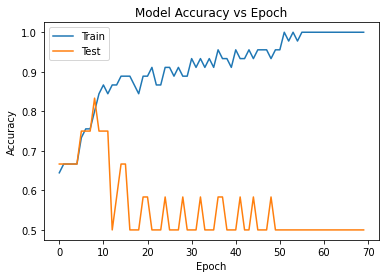

In [ ]:
# Accurasy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

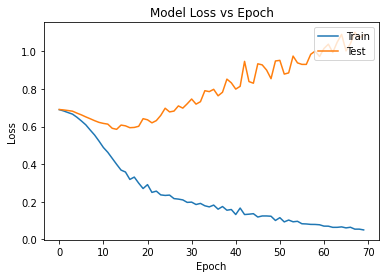

In [ ]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Now let's build an algorithm based on machine learning for classification.

In [ ]:
# We will use the continents tree in this classification process.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33) #criterion can be entropy
DecisionTreeClassifierModel.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=33, splitter='best')

In [ ]:
#Calculating Details
# Here is the success rate of the training sample
print('DecisionTreeClassifierModel Train Score is : ' , DecisionTreeClassifierModel.score(x_train, y_train))
# And now our date with the success rate of the same training.
print('DecisionTreeClassifierModel Test Score is : ' , DecisionTreeClassifierModel.score(x_test, y_test))
# Here to show how many classes we have
print('DecisionTreeClassifierModel Classes are : ' , DecisionTreeClassifierModel.classes_)
# This instruction is very important in knowing which of the features that have the most impact on the model out of the 12 features that we have.
print('DecisionTreeClassifierModel feature importances are : ' , DecisionTreeClassifierModel.feature_importances_)
print(len( DecisionTreeClassifierModel.feature_importances_))

DecisionTreeClassifierModel Train Score is :  0.93359375
DecisionTreeClassifierModel Test Score is :  0.9473684210526315
DecisionTreeClassifierModel Classes are :  [0 1]
DecisionTreeClassifierModel feature importances are :  [0.772127   0.09141245 0.         0.10394995 0.00205591 0.
 0.         0.         0.         0.03045469 0.         0.        ]
12


In [ ]:
#Calculating Prediction
y_pred = DecisionTreeClassifierModel.predict(x_test)
y_pred_prob = DecisionTreeClassifierModel.predict_proba(x_test)
print('Predicted Value for DecisionTreeClassifierModel is : ' , y_pred[:10])
print("The first 10 elements of the test sample so that we know whether they match or not : " , y_test[:10])
# This instruction is important as it shows the percentage / probability of choosing each of the two projectors.
print('Prediction Probabilities Value for DecisionTreeClassifierModel is : ' , y_pred_prob[:10])


Predicted Value for DecisionTreeClassifierModel is :  [0 0 0 0 1 0 0 0 1 0]
The first 10 elements of the test sample so that we know whether they match or not :  [0 1 0 0 1 0 0 0 0 0]
Prediction Probabilities Value for DecisionTreeClassifierModel is :  [[0.99519231 0.00480769]
 [0.84146341 0.15853659]
 [0.68181818 0.31818182]
 [0.99519231 0.00480769]
 [0.19047619 0.80952381]
 [0.99519231 0.00480769]
 [0.84146341 0.15853659]
 [0.99519231 0.00480769]
 [0.         1.        ]
 [0.99519231 0.00480769]]


Confusion Matrix is : 
 [[37  1]
 [ 2 17]]


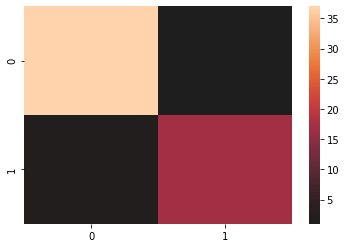

In [ ]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, center = True)
plt.show()
 


The results we obtained through the use of algorithms show that the results of using the continents tree were better than using a neural network for classification. The reason is clear because the data we have is very little for the neural network, and certainly there may be a defect in the structural structure of the neural network, and also it may be due to the advantages that we have excluding it.
Anyway, the results were good.

#Thank you so much .

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/alymohammedbakhit2020/breast-cancer-classifiction


'https://jovian.ai/alymohammedbakhit2020/breast-cancer-classifiction'